# Import Libraries

In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from google.colab import files
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [3]:
pd.set_option('display.max_columns', None)
plt.style.use("ggplot")

# EDA

In [4]:
uploaded = files.upload()

Saving Data Train.csv to Data Train.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['Data Train.csv']))
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
print('Jumlah baris data:', df.shape[0], '\nJumlah kolom:', df.shape[1])

Jumlah baris data: 4250 
Jumlah kolom: 20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
def summary_tab(df):
  summary = pd.DataFrame({'Column': df.columns,
                          'Data Types': df.dtypes,
                          'Null': df.isna().sum(),
                          'Null Percentage': round(df.isna().sum() / len(df) * 100, 2),
                          'Unique': df.nunique(),
                          'Unique Sample': [list(df[i].drop_duplicates().sample(2)) for i in df.columns]
                          })
  summary['Unique(%)'] = round(summary['Unique'] / len(df) * 100, 2)                    

  return summary

In [97]:
summary_tab(df)

,Column,Data Types,Null,Null Percentage,Unique,Unique Sample,Unique(%)
state,state,object,0,0.0,51,"[RI, NC]",1.20
account_length,account_length,int64,0,0.0,215,"[176, 143]",5.06
area_code,area_code,object,0,0.0,3,"[area_code_510, area_code_408]",0.07
international_plan,international_plan,object,0,0.0,2,"[yes, no]",0.05
voice_mail_plan,voice_mail_plan,object,0,0.0,2,"[yes, no]",0.05
number_vmail_messages,number_vmail_messages,int64,0,0.0,46,"[49, 41]",1.08
total_day_minutes,total_day_minutes,float64,0,0.0,1843,"[41.2, 183.3]",43.36
total_day_calls,total_day_calls,int64,0,0.0,120,"[49, 66]",2.82
total_day_charge,total_day_charge,float64,0,0.0,1843,"[13.36, 22.13]",43.36
total_eve_minutes,total_eve_minutes,float64,0,0.0,1773,"[251.2, 351.6]",41.72


In [99]:
numerical = df.select_dtypes(include='number')
categorical = df.select_dtypes(include='object')
display(numerical.head(3), categorical.head(3))

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2


,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no


In [100]:
def get_len_outliers(df):
    # Menghitung 25th dan 75th percentile
    p75 = df.quantile(0.75)
    p25 = df.quantile(0.25)
    # Menghitung IQR dengan selisih 25th dan 75th percentile
    iqr = p75 - p25
    
    # "Minimum non-outlier value": 25th percentile - 1.5 * IQR
    min_val = p25 - 1.5*iqr
    # "Maximum non-outlier value": 75th percentile + 1.5 * IQR
    max_val = p75 + 1.5*iqr

    # Apapun dibawah minimum atau diatas maximum, disebut sebagai outlier
    outliers = df[(df < min_val) | (df > max_val)]
    return len(outliers)

In [101]:
descript = df.describe(include='number').T
descript['num_outlier'] = numerical.apply(get_len_outliers).values
descript

,count,mean,std,min,25%,50%,75%,max,num_outlier
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00,20
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00,86
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50,25
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00,28
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76,26
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30,34
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00,24
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54,34
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00,37
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00,33


In [13]:
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


In [14]:
print(categorical['churn'].value_counts())
print('\n')
print(f"{categorical['churn'].value_counts(normalize = True) * 100}")

no     3652
yes     598
Name: churn, dtype: int64


no     85.929412
yes    14.070588
Name: churn, dtype: float64


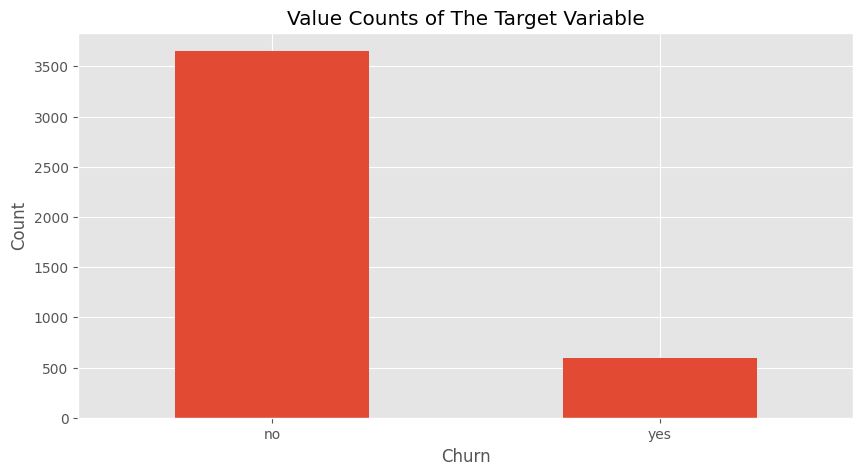

In [15]:
plt.figure(figsize=(10, 5))
categorical['churn'].value_counts().plot(kind="bar")
plt.title("Value Counts of The Target Variable")
plt.xlabel("Churn")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [16]:
numerical['churn_encoded'] = df['churn'].replace({'no':0, 'yes':1,})
numerical.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn_encoded
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


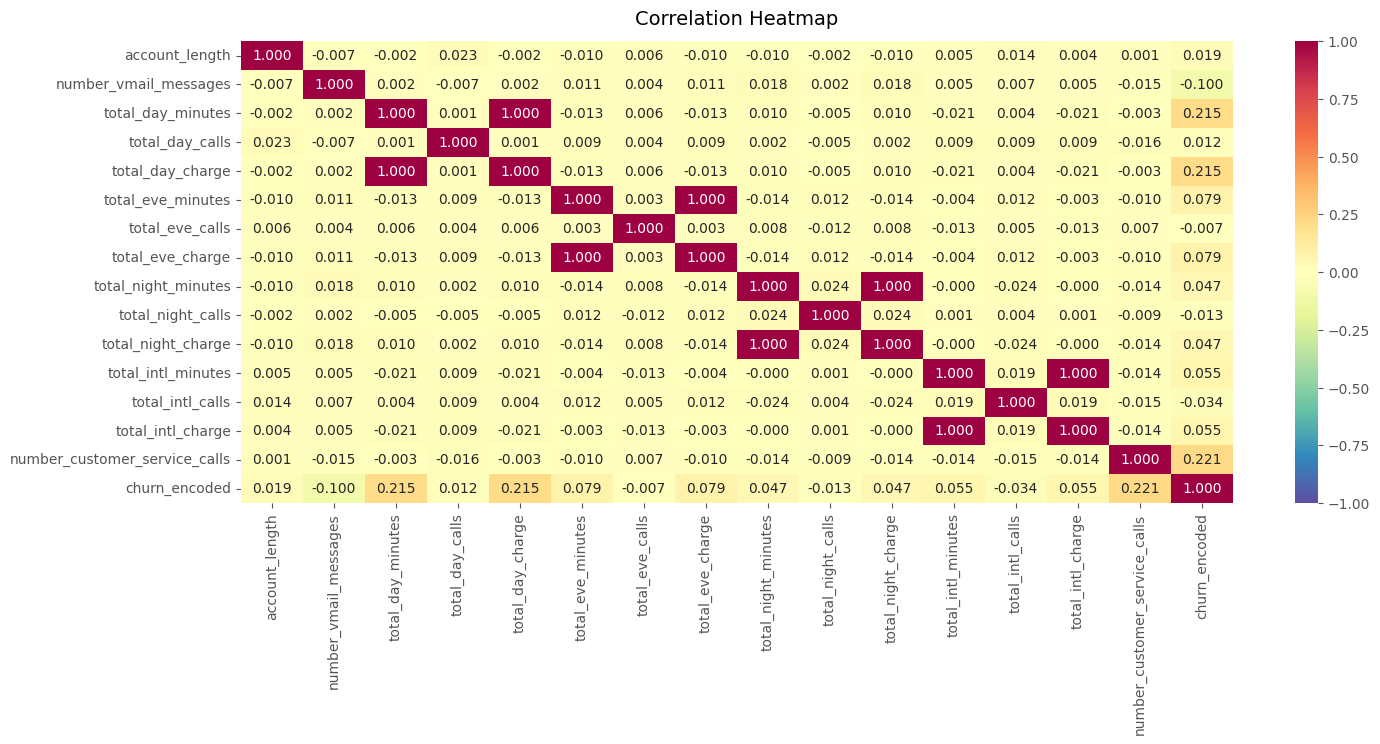

In [17]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numerical.corr(), fmt='.3f', annot_kws={'size': 10}, vmin=-1, vmax=1, annot=True, cmap="Spectral_r")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

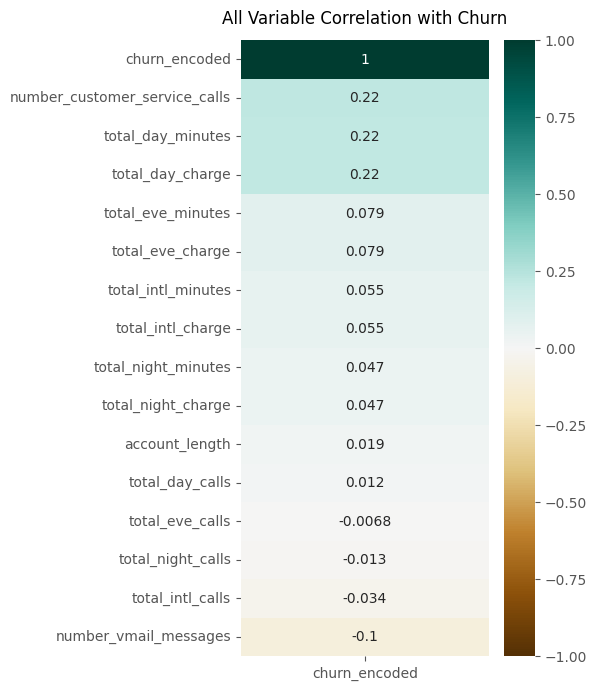

In [18]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(numerical.corr()[['churn_encoded']].sort_values(by='churn_encoded', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('All Variable Correlation with Churn', fontdict={'fontsize':12}, pad=12);

In [19]:
df_analysis = numerical[['number_customer_service_calls', 'total_day_minutes', 'total_day_charge', 'number_vmail_messages']].copy()
df_analysis['churn'] = categorical['churn'].copy()

df_analysis.head()

,number_customer_service_calls,total_day_minutes,total_day_charge,number_vmail_messages,churn
0,1,161.6,27.47,26,no
1,0,243.4,41.38,0,no
2,2,299.4,50.90,0,no
3,3,166.7,28.34,0,no
4,3,218.2,37.09,24,no


Text(0.5, 1.0, 'number_customer_service_calls vs churn')

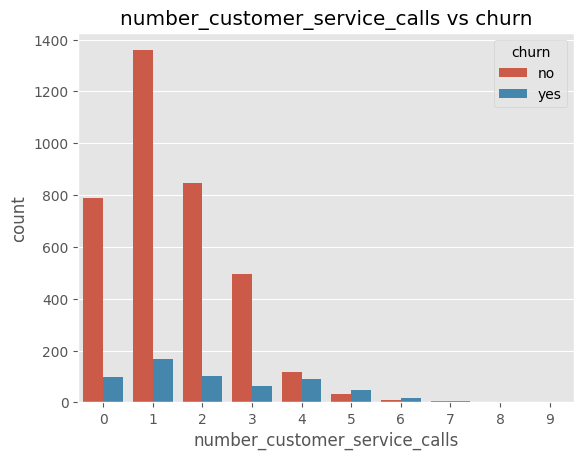

In [102]:
sns.countplot(x=df_analysis['number_customer_service_calls'], hue=df_analysis['churn'])
plt.title('number_customer_service_calls vs churn')

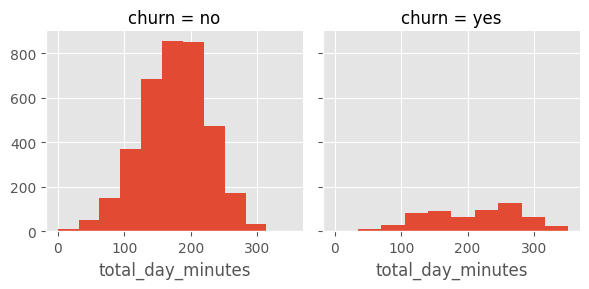

In [21]:
f = sns.FacetGrid(df_analysis, col='churn')
f.map(plt.hist, 'total_day_minutes')

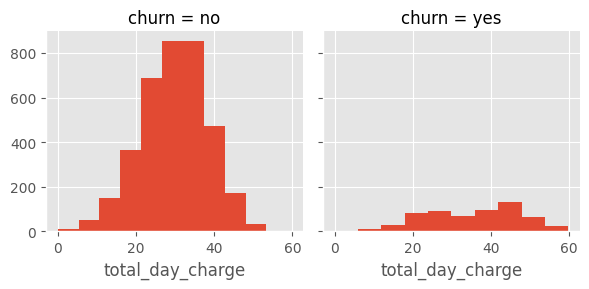

In [22]:
f = sns.FacetGrid(df_analysis, col='churn')
f.map(plt.hist, 'total_day_charge')

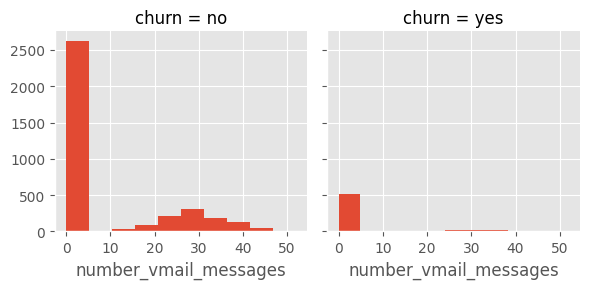

In [23]:
f = sns.FacetGrid(df_analysis, col='churn')
f.map(plt.hist, 'number_vmail_messages')

# Preprocessing

## Data Cleaning

### Missing Value

In [103]:
df.isna().sum() #Tidak ditemukan adanya missing value di data training

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

### Duplicated Data

In [104]:
#Tidak ditemukan adanya data duplikat di data training
print('Jumlah data duplikat pada data:', df.duplicated().sum())

Jumlah data duplikat pada data: 0


## Detect Outliers

In [105]:
print(f'Jumlah baris data sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 
            'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 
            'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 
            'total_intl_calls', 'number_customer_service_calls']: #without total_intl_charge
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df_no_outliers = df[filtered_entries]

print(f'Jumlah baris data setelah memfilter outlier: {len(df_no_outliers)}')

Jumlah baris data sebelum memfilter outlier: 4250
Jumlah baris data setelah memfilter outlier: 3515


## Feature Encoding - Label Encoding

In [106]:
df_encoded = df_no_outliers.copy()

le = LabelEncoder()

df_encoded[['international_plan']] = df_no_outliers[['international_plan']].apply(le.fit_transform)
df_encoded[['voice_mail_plan']] = df_no_outliers[['voice_mail_plan']].apply(le.fit_transform)
df_encoded[['churn']] = df_no_outliers[['churn']].apply(le.fit_transform)

df_encoded.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
7,WV,141,area_code_415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [107]:
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print('mapping:', le_mapping)

mapping: {'no': 0, 'yes': 1}


## Feature selection & Drop target variable

In [109]:
X = df_encoded.drop(['state', 'area_code', 'churn'], axis=1)
y = np.ravel(df_encoded[['churn']])

print(X.shape, y.shape)

(3515, 17) (3515,)


## Scaling using MinMaxScaler

In [110]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(3515, 17)

# Train-test Split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 60, stratify=y)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2460, 17)
y_train shape: (2460,)
X_test shape: (1055, 17)
y_test shape: (1055,)


In [112]:
print('Number of class 0 (no) in y_train:', (y_train == 0).sum())
print('Number of class 1 (yes) in y_train:', (y_train == 1).sum())
print('Number of class 0 (no) in y_test:', (y_test == 0).sum())
print('Number of class 1 (yes) in y_test:', (y_test == 1).sum())

Number of class 0 (no) in y_train: 2202
Number of class 1 (yes) in y_train: 258
Number of class 0 (no) in y_test: 945
Number of class 1 (yes) in y_test: 110


# Classification Model

## KNN

In [113]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = 100 * accuracy_score(y_test, y_pred)

y_pred_proba = knn.predict_proba(X_test)[:,1]
roc_auc_sc = 100 * roc_auc_score(y_test, y_pred_proba)

print('Accuracy: %2.3f %%'%acc)
print("AUC of ROC: %2.3f %%" %roc_auc_sc)

Accuracy: 92.322 %
AUC of ROC: 85.467 %


In [114]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.929     0.990     0.959       945
           1      0.809     0.345     0.484       110

    accuracy                          0.923      1055
   macro avg      0.869     0.668     0.721      1055
weighted avg      0.916     0.923     0.909      1055



## GNB

In [115]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
acc = 100 * accuracy_score(y_test, y_pred)

y_pred_proba = gnb.predict_proba(X_test)[:,1]
roc_auc_sc = 100 * roc_auc_score(y_test, y_pred_proba)

print('Accuracy: %2.3f %%'%acc)
print("AUC of ROC: %2.3f %%" %roc_auc_sc)

Accuracy: 92.417 %
AUC of ROC: 89.086 %


In [116]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.970     0.945     0.957       945
           1      0.612     0.745     0.672       110

    accuracy                          0.924      1055
   macro avg      0.791     0.845     0.815      1055
weighted avg      0.932     0.924     0.927      1055



## Logistic Regression

In [117]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)
acc = 100 * accuracy_score(y_test, y_pred)

y_pred_proba = logr.predict_proba(X_test)[:,1]
roc_auc_sc = 100 * roc_auc_score(y_test, y_pred_proba)

print('Accuracy: %2.3f %%'%acc)
print("AUC of ROC: %2.3f %%" %roc_auc_sc)

Accuracy: 90.237 %
AUC of ROC: 89.837 %


In [118]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.914     0.983     0.947       945
           1      0.590     0.209     0.309       110

    accuracy                          0.902      1055
   macro avg      0.752     0.596     0.628      1055
weighted avg      0.881     0.902     0.881      1055



## Decision Tree

In [119]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc = 100 * accuracy_score(y_test, y_pred)

y_pred_proba = dtc.predict_proba(X_test)[:,1]
roc_auc_sc = 100 * roc_auc_score(y_test, y_pred_proba)

print('Accuracy: %2.3f %%'%acc)
print("AUC of ROC: %2.3f %%" %roc_auc_sc)

Accuracy: 92.133 %
AUC of ROC: 81.150 %


In [120]:
params = {'criterion':['gini','entropy'],'max_depth':[3,5,7,9,11]}
grid_dtc = GridSearchCV(
             estimator=dtc,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10,
             cv = 10
            )

grid_dtc.fit(X_train, y_train)
grid_dtc.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [121]:
y_pred = grid_dtc.predict(X_test)
acc = 100 * accuracy_score(y_test, y_pred)

y_pred_proba = grid_dtc.predict_proba(X_test)[:,1]
roc_auc_sc = 100 * roc_auc_score(y_test, y_pred_proba)

print('Accuracy: %2.3f %%'%acc)
print("AUC of ROC: %2.3f %%" %roc_auc_sc)

Accuracy: 96.209 %
AUC of ROC: 85.509 %


In [82]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.965     0.993     0.979       945
           1      0.916     0.691     0.788       110

    accuracy                          0.961      1055
   macro avg      0.940     0.842     0.883      1055
weighted avg      0.960     0.961     0.959      1055



## SVM

In [122]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = 100 * accuracy_score(y_test, y_pred)

y_pred_proba = svc.predict_proba(X_test)[:,1]
roc_auc_sc = 100 * roc_auc_score(y_test, y_pred_proba)

print('Accuracy: %2.3f %%'%acc)
print("AUC of ROC: %2.3f %%" %roc_auc_sc)

Accuracy: 93.744 %
AUC of ROC: 91.041 %


In [123]:
params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid_svc = GridSearchCV(
             estimator=svc,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10,
             cv = 10
            )

grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 1000, 'gamma': 0.1}

In [124]:
y_pred = grid_svc.predict(X_test)
acc = 100 * accuracy_score(y_test, y_pred)

y_pred_proba = grid_svc.predict_proba(X_test)[:,1]
roc_auc_sc = 100 * roc_auc_score(y_test, y_pred_proba)

print('Accuracy: %2.3f %%'%acc)
print("AUC of ROC: %2.3f %%" %roc_auc_sc)

Accuracy: 95.640 %
AUC of ROC: 90.830 %


In [125]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.963     0.989     0.976       945
           1      0.881     0.673     0.763       110

    accuracy                          0.956      1055
   macro avg      0.922     0.831     0.869      1055
weighted avg      0.954     0.956     0.954      1055



# Prediction using Test Data

In [6]:
uploaded2 = files.upload()

Saving Data Test.csv to Data Test.csv


In [128]:
df_test = pd.read_csv(io.BytesIO(uploaded2['Data Test.csv']))
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [129]:
df_test.shape

(750, 20)

In [130]:
df_test.isna().sum() #Tidak ditemukan adanya missing value di data testing

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [91]:
df_test_encoded = df_test.copy()

df_test_encoded[['international_plan']] = df_test[['international_plan']].apply(le.transform)
df_test_encoded[['voice_mail_plan']] = df_test[['voice_mail_plan']].apply(le.transform)

df_test_encoded.drop(['id', 'state', 'area_code'], axis=1, inplace=True)
df_test_encoded.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [92]:
X_test_scaled = scaler.transform(df_test_encoded)
X_test_scaled.shape

(750, 17)

In [135]:
ypred = grid_svc.predict(X_test_scaled)
print(ypred)
unique, counts = np.unique(ypred, return_counts=True)
print('\n')
print(dict(zip(unique, counts)))
print('\n')
print('Churn mapping:\n', le_mapping)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 

In [136]:
df_result = df_test.copy()
df_result['churn'] = ['yes' if(x) else 'no' for x in ypred]
df_result

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,no
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,no
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,no
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,no
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,no
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
